# Session 2: Training a network w/ Tensorflow
<p class='lead'>
Creative Applications of Deep Learning with Google's Tensorflow<br />
Parag K. Mital<br />
Kadenze, Inc.<br />
</p>

<a name="learning-goals"></a>
# Learning Goals

* The basic components of a neural network
* How to use gradient descent to optimize parameters of a neural network
* How to create a neural network for performing regression

<!-- MarkdownTOC autolink=true autoanchor=true bracket=round -->

- [Introduction](#introduction)
- [Gradient Descent](#gradient-descent)
    - [Defining Cost](#defining-cost)
    - [Minimizing Error](#minimizing-error)
    - [Backpropagation](#backpropagation)
    - [Extra details for notebook only](#extra-details-for-notebook-only)
    - [Local Minima/Optima](#local-minimaoptima)
    - [Learning Rate](#learning-rate)
- [Creating a Neural Network](#creating-a-neural-network)
    - [Defining Cost](#defining-cost-1)
    - [Training Parameters](#training-parameters)
    - [Training vs. Testing](#training-vs-testing)
    - [Stochastic and Mini Batch Gradient Descent](#stochastic-and-mini-batch-gradient-descent)
    - [Input's Representation](#inputs-representation)
    - [Over vs. Underfitting](#over-vs-underfitting)
    - [Introducing Nonlinearities / Activation Function](#introducing-nonlinearities--activation-function)
    - [Going Deeper](#going-deeper)
- [Image Inpainting](#image-inpainting)
    - [Description](#description)
    - [Building the Network](#building-the-network)
    - [Training](#training)
- [Homework:](#homework)
- [Reading:](#reading)

<!-- /MarkdownTOC -->

<a name="introduction"></a>
# Introduction

In this session we're going to take everything we've learned about Graphs, Sessions, Operations, and Tensors and use them all to form a neural network.  We're going to learn how we can use data and something called gradient descent to teach the network what the values of the parameters of this network should be.

In the last session, we saw how to normalize a dataset, using the dataset's mean and standard deviation.  While this seemed to reveal some interesting representations of our dataset, it left us with a lot more to explain.  In the case of faces, it really seemed to explain more about the background than the actual faces.  For instance, it wasn't able to describe the differences between different races, gender, expressions, hair style, hair color, or the other many various differences that one might be interested in.

What we're really interested in is letting the computer figure out what representations it needs in order to better describe the data and some objective that we've defined.  That is the fundamental idea behind machine learning: letting the machine learn from the data.  In this session, we're going to start to see how to do that.

Before we get into the details, I'm going to go over some background on gradient descent and the different components of a neural network.  If you're comfortable with all of this, please feel free to skip ahead.

<a name="gradient-descent"></a>
# Gradient Descent

Whenever we create a neural network, we have to define a set of operations.  These operations try to take us from some input to some output.  For instance, the input might be an image, or frame of a video, or text file, or sound file.  The operations of the network are meant to transform this input data into something meaningful that we want the network to learn about.

Initially, all of the parameters of the network are random.  So whatever is being output will also be random.  But let's say we need it to output something specific about the image.  To teach it to do that, we're going to use something called "Gradient Descent".  Simply, Gradient descent is a way of optimizing a set of parameters.

Let's say we have a few images, and know that given a certain image, when I feed it through a network, its parameters should help the final output of the network be able to spit out the word "orange", or "apple", or some appropriate *label* given the image of that object.  The parameters should somehow accentuate the "orangeness" of my image.  It probably will be able to transform an image in away that it ends up having high intensities for images that have the color orange in them, and probably prefer images that have that color in a fairly round arrangement.

Rather than hand crafting all of the possible ways an orange might be manifested, we're going to learn the best way to optimize its objective: separating oranges and apples.  How can we teach a network to learn something like this?

<a name="defining-cost"></a>
## Defining Cost

Well we need to define what "best" means.  In order to do so, we need a measure of the "error".  Let's continue with the two options we've been using: orange, or apple.  I can represent these as 0 and 1 instead.

I'm going to get a few images of oranges, and apples, and one by one, feed them into a network that I've randomly initialized.  I'll then filter the image, by just multiplying every value by some random set of values.  And then I'll just add up all the numbers, and then squash the result in a way that means I'll only ever get 0 or 1.  So I put in an image, and I get out a 0 or 1.  Except, the parameters of my network are totally random, and so my network will only ever spit out random 0s or 1s.  How can I get this random network to know when to spit out a 0 for images of oranges, and a 1 for images of apples?

We do that by saying, if the network predicts a 0 for an orange, then the error is 0.  If the network predicts a 1 for an orange, then the error is 1.  And vice-versa for apples.  If it spits out a 1 for an apple, then the error is 0.  If it spits out a 0 for an apple, then the error is 1.  What we've just done is create a function which describes error in terms of our parameters:

Let's write this another way:

\begin{align}
\text{error} = \text{network}(\text{image}) - \text{true_label}
\end{align}

where

\begin{align}
\text{network}(\text{image}) = \text{predicted_label}
\end{align}

More commonly, we'll see these components represented by the following letters:

\begin{align}
E = f(X) - y
\end{align}

Don't worry about trying to remember this equation.  Just see how it is similar to what we've done with the oranges and apples.  `X` is generally the input to the network, which is fed to some network, or a function $f$, which we know should output some label `y`.  Whatever difference there is between what it should output, y, and what it actually outputs, $f(x)$ is what is different, or error, $E$.


<a name="minimizing-error"></a>
## Minimizing Error

Instead of feeding one image at a time, we're going to feed in many.  Let's say 100.  This way, we can see what our network is doing on average.  If our error at the current network parameters is e.g. 50/100, we're correctly guessing about 50 of the 100 images.

Now for the crucial part.  If we move our network's parameters a tiny bit and see what happens to our error, we can actually use that knowledge to find smaller errors.  Let's say the error went up after we moved our network parameters.  Well then we know we should go back the way we came, and try going the other direction entirely.  If our error went down, then we should just keep changing our parameters in the same direction.  The error provides a "training signal" or a measure of the "loss" of our network.  You'll often hear anyone number of these terms to describe the same thing, "Error", "Cost", "Loss", or "Training Signal'.  That's pretty much gradient descent in a nutshell.  Of course we've made a lot of assumptions in assuming our function is continuous and differentiable.  But we're not going to worry about that, and if you don't know what that means, don't worry about it.

<a name="backpropagation"></a>
## Backpropagation

To summarize, Gradient descent is a simple but very powerful method for finding smaller measures of error by following the negative direction of its gradient.  The gradient is just saying, how does the error change at the current set of parameters?

One thing I didn't mention was how we figure out what the gradient is.  In order to do that, we use something called backpropagation.  When we pass as input something to a network, it's doing what's called forward propagation.  We're sending an input and multiplying it by every weight to an expected output.  Whatever differences that output has with the output we wanted it to have, gets *backpropagated* to every single parameter in our network.  Basically, backprop is a very effective way to find the gradient by simply multiplying many partial derivatives together.  It uses something called the chain rule to find the gradient of the error with respect to every single parameter in a network, and follows this error from the output of the network, all the way back to the input.

While the details won't be necessary for this course, we will come back to it in later sessions as we learn more about how we can use both backprop and forward prop to help us understand the inner workings of deep neural networks.

If you are interested in knowing more details about backprop, I highly recommend both Michael Nielsen's online Deep Learning book:

http://neuralnetworksanddeeplearning.com/

and Yoshua Bengio's online book:

http://www.deeplearningbook.org/

<a name="extra-details-for-notebook-only"></a>
## Extra details for notebook only

To think about this another way, the definition of a linear function is written like so:

\begin{align}
y = mx + b
\end{align}

The slope, or gradient of this function is $m$ everywhere.  It's describing how the function changes with different network parameters.  If I follow the negative value of $m$, then I'm going down the slope, towards smaller values.

But not all functions are linear.  Let's say the error was something like a parabola:

\begin{align}
y(x) = x^2
\end{align}

That just says, there is a function y, which takes one parameter, $x$, and this function just takes the value of $x$ and multiplies it by itself, or put another way, it outputs $x^2$.  Let's start at the minimum.  At $x = 0$, our function $y(0) = 0$.  Let's try and move a random amount, and say we end up at $1$.  So at $x = 1$, we know that our function went up from $y(0) = 0$ to $y(1) = 1$.  The change in $y = 1$.  The change in $x = 1$.  So our slope is:

\begin{align}
\frac{\text{change in } y}{\text{change in } x} = \frac{(y(1) - y(0)}{(1 - 0)} = \frac{1}{1} = 1
\end{align}

If we go in the negative direction of this, $x = x - 1$, we get back to 0, our minimum value.

If you try this process for any value and you'll see that if you keep going towards the negative slope, you go towards smaller values.

You might also see this process described like so:

\begin{align}
\theta = \theta - \eta \cdot \nabla_\theta J( \theta)
\end{align}

That's just saying the same thing really.  We're going to update our parameters, commonly referred to by $\theta$, by finding the gradient, $\nabla$ with respect to parameters $\theta$, $\nabla_\theta$, of our error, $J$, and moving down the negative direction of it: $- \eta \cdot \nabla_\theta J( \theta)$.  The $\eta$ is just a parameter also known as the learning rate, and it describes how far along this gradient we should travel, and we'll typically set this value from anywhere between 0.01 to 0.00001.

<a name="local-minimaoptima"></a>
## Local Minima/Optima

Before we start, we're going to need some library imports:

In [2]:
# imports
%matplotlib inline
# %pylab osx
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
plt.style.use('ggplot')

One pitfall of gradient descent is that some functions contain "minima", which is another way of saying a trough, or a concave point, or put another way, a dip in a function.

Let's say, purely for illustration, that our cost function looked like:

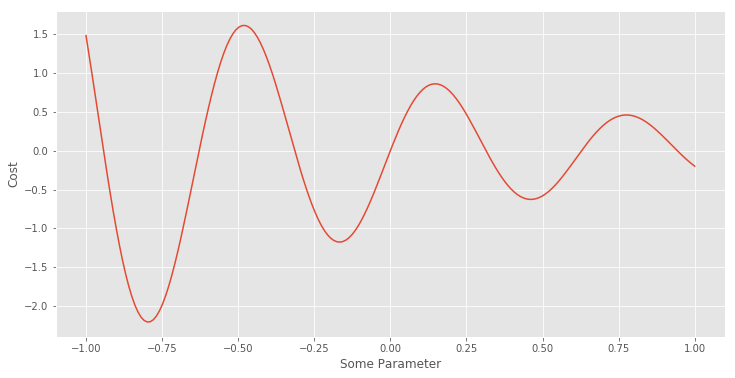

In [142]:
fig = plt.figure(figsize=(12, 6))
ax = fig.gca()
x = np.linspace(-1, 1, 200)
hz = 10
cost = np.sin(hz*x)*np.exp(-x)
ax.plot(x, cost)
ax.set_ylabel('Cost')
ax.set_xlabel('Some Parameter')

We'll never really ever be able to see our entire cost function like this.  If we were able to, we'd know exactly what parameter we should use.  So we're just imagining that as any parameters in our network change, this is how cost would change.  Since we know the value of the cost everywhere, we can easily describe the gradient using `np.diff`, which will just measure the difference between every value.  That's a good approximation of the gradient for this illustration at least.

In [97]:
gradient = np.diff(cost)

If we follow the negative gradient of this function given some randomly intialized parameter and a learning rate:

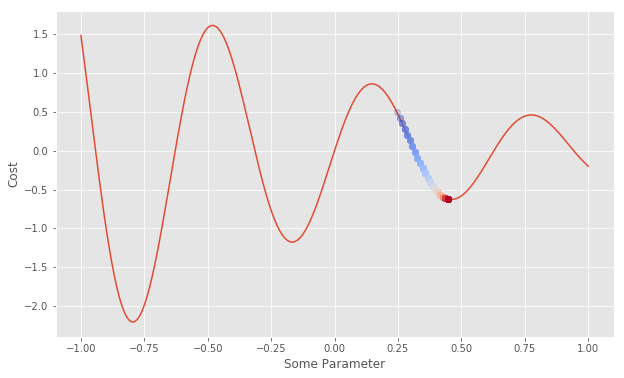

In [144]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca()
x = np.linspace(-1, 1, 200)
hz = 10
cost = np.sin(hz*x)*np.exp(-x)
ax.plot(x, cost)
ax.set_ylabel('Cost')
ax.set_xlabel('Some Parameter')
n_iterations = 500
cmap = plt.get_cmap('coolwarm')
c_norm = colors.Normalize(vmin=0, vmax=n_iterations)
scalar_map = cmx.ScalarMappable(norm=c_norm, cmap=cmap)
init_p = np.random.randint(len(x)*0.2, len(x)*0.8)
learning_rate = 1.0
for iter_i in range(n_iterations):
    init_p -= learning_rate * gradient[int(init_p)]
    ax.plot(x[int(init_p)], cost[int(init_p)], 'ro', alpha=(iter_i + 1) / n_iterations, color=scalar_map.to_rgba(iter_i))

What this would mean is depending on where our random initialization of weights began, our final cost might end up being somewhere around -0.5.  This is a local minima.  It is, based on its surroundings, a minima.  But it is not the global minima.  In fact there are a few other possible places the network could have ended up, if our initialization led us to another point first, meaning our final cost would have been different.

This illustration is just for a single parameter... but our networks will often have millions of parameters... I'll illustrate the same idea with just two parameters to give you a sense of how quickly the problem becomes very difficult.

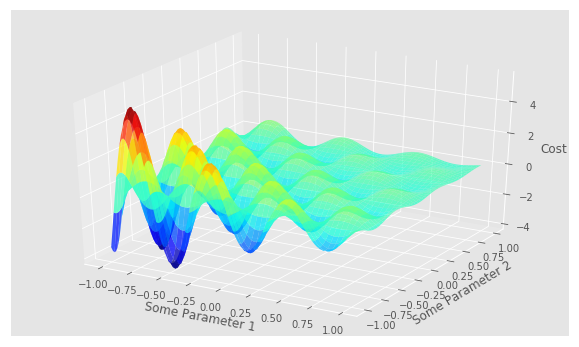

In [99]:
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
x, y = np.mgrid[-1:1:0.02, -1:1:0.02]
X, Y, Z = x, y, np.sin(hz*x)*np.exp(-x)*np.cos(hz*y)*np.exp(-y)
ax.plot_surface(X, Y, Z, rstride=2, cstride=2, alpha=0.75, cmap='jet', shade=False)
ax.set_xlabel('Some Parameter 1')
ax.set_ylabel('Some Parameter 2')
ax.set_zlabel('Cost')
# ax.axis('off')

It turns out that in practice, as the number of your parameters grows, say to a million, then finding a local minima will more often than not turn out to be very good minima.  That's good news for deep networks as we'll often work with that many parameters.

<a name="learning-rate"></a>
## Learning Rate

Another aspect of learning what our parameters should be, is how far along the gradient we should move our parameters?  That is also known as `learning_rate`.  Let's see what happens for different values of our learning rate:

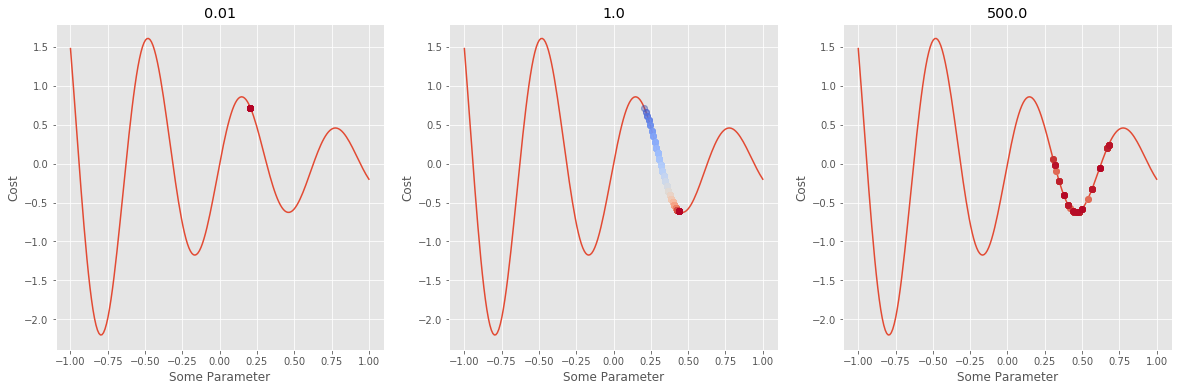

In [100]:
fig, axs = plt.subplots(1, 3, figsize=(20, 6))
for rate_i, learning_rate in enumerate([0.01, 1.0, 500.0]):
    ax = axs[rate_i]
    x = np.linspace(-1, 1, 200)
    hz = 10
    cost = np.sin(hz*x)*np.exp(-x)
    ax.plot(x, cost)
    ax.set_ylabel('Cost')
    ax.set_xlabel('Some Parameter')
    ax.set_title(str(learning_rate))
    n_iterations = 500
    cmap = plt.get_cmap('coolwarm')
    c_norm = colors.Normalize(vmin=0, vmax=n_iterations)
    scalar_map = cmx.ScalarMappable(norm=c_norm, cmap=cmap)
    init_p = 120#np.random.randint(len(x)*0.2, len(x)*0.8)
    for iter_i in range(n_iterations):
        init_p -= learning_rate * gradient[int(init_p)]
        ax.plot(x[int(init_p)], cost[int(init_p)], 'ro', alpha=(iter_i + 1) / n_iterations, color=scalar_map.to_rgba(iter_i))

In the first case, our learning rate was way too small.  It looks like we didn't manage to get any better cost than where we started!  In the second case, just right.  In the third case, our learning rate was too large.  Meaning, we overshot our minima, and moved past it.  So our cost has the effect of going up and down, instead of just going down like in the second case.

We'll learn more tricks for changing this landscape to be a bit more concave, reducing the number of local minima by regularizing the landscape through many different extensions to this same basic idea of following the negative slope of our gradient.  Before we can get into them we'll need to learn how to create a neural network.

<a name="creating-a-neural-network"></a>
# Creating a Neural Network

Let's try a simple example network.  We're going try to find a mapping of an input `X` to an output `y`, just like in our example of mapping an input image to either a 0 or 1.

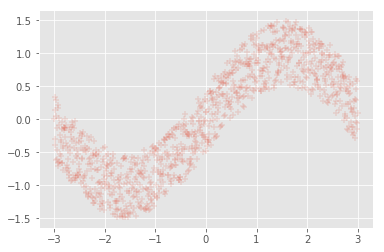

In [150]:
# Let's create some toy data

# We are going to say that we have seen 1000 values of some underlying representation that we aim to discover
n_observations = 1000

# Instead of having an image as our input, we're going to have values from -3 to 3.  This is going to be the input to our network.
xs = np.linspace(-3, 3, n_observations)

# From this input, we're going to teach our network to represent a function that looks like a sine wave.  To make it difficult, we are going to create a noisy representation of a sine wave by adding uniform noise.  So our true representation is a sine wave, but we are going to make it difficult by adding some noise to the function, and try to have our algorithm discover the underlying cause of the data, which is the sine wave without any noise.
ys = np.sin(xs) + np.random.uniform(-0.5, 0.5, n_observations)
plt.scatter(xs, ys, alpha=0.15, marker='+')

So now we can see that there is a sine wave looking thing but it's really noisy.  We want to train a network to say, given any value on the $x$ axis, tell me what the value should be on the $y$ axis.  That is the fundamental idea of regression.  Predicting some continuous output value given some continuous input value.

<a name="defining-cost-1"></a>
## Defining Cost

We're going to use tensorflow to train our first network:

In [102]:
# variables which we need to fill in when we are ready to compute the graph.
# We'll pass in the values of the x-axis to a placeholder called X.
X = tf.placeholder(tf.float32, name='X')

# And we'll also specify what the y values should be using another placeholder, y.
Y = tf.placeholder(tf.float32, name='Y')

Now for parameters of our network.  We're going to transform our x values, just like we did with an image and filtering it.  In order to do that, we're going to multiply the value of x by some unknown value.  Pretty simple.  So what that lets us do is scale the value coming in.  We'll also allow for a simple shift by adding another number.  That lets us move the range of values to any new position.

But we need an initial value for our parameters.  For that, we're going to use values close to 0 using a gaussian function:

/opt/conda/lib/python3.6/site-packages/tensorflow/python/client/session.py:1711: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


(array([  4.,   3.,  25.,  98., 232., 297., 194., 109.,  26.,  12.]),
 array([-3.74708486, -3.06069775, -2.37431064, -1.68792353, -1.00153642,
        -0.31514931,  0.3712378 ,  1.05762491,  1.74401202,  2.43039913,
         3.11678624]),
 <a list of 10 Patch objects>)

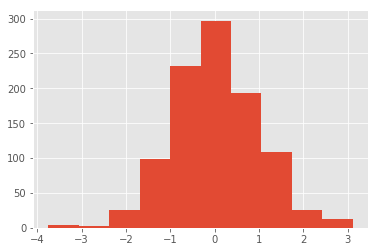

In [103]:
sess = tf.InteractiveSession()
n = tf.random_normal([1000]).eval()
plt.hist(n)

In order to do that, we can use the tensorflow `random_normal` function.  If we ask for 1000 values and then plot a histogram of the values, we can see that the values are centered around 0 and are mostly between -3 and 3.  For neural networks, we will usually want the values to start off much closer to 0.  To do that, we can control the standard deviation like so:

(array([  4.,  19.,  59., 146., 263., 254., 162.,  66.,  24.,   3.]),
 array([-0.34596202, -0.27767435, -0.20938668, -0.14109901, -0.07281135,
        -0.00452368,  0.06376399,  0.13205166,  0.20033932,  0.26862699,
         0.33691466]),
 <a list of 10 Patch objects>)

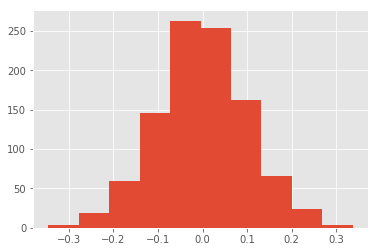

In [104]:
n = tf.random_normal([1000], stddev=0.1).eval()
plt.hist(n)

In [105]:
# To create the variables, we'll use tf.Variable, which unlike a placeholder, does not require us 
# to define the value at the start of a run/eval.  
# It does need an initial value, which we'll give right now using 
# the function tf.random_normal.  We could also pass an initializer, 
# which is simply a function which will call the same function.  
# We'll see how that works a bit later.  In any case, the random_normal 
# function just says, give me a random value from the "normal" curve.  
#We pass that value to a tf.Variable which creates a tensor object.
W = tf.Variable(tf.random_normal([1], dtype=tf.float32, stddev=0.1), name='weight')

# For bias variables, we usually start with a constant value of 0.
B = tf.Variable(tf.constant([0], dtype=tf.float32), name='bias')

# Now we can scale our input placeholder by W, and add our bias, b.
Y_pred = X * W + B

We're going to use gradient descent to learn what the best value of `W` and `b` is.  In order to do that, we need to know how to measure what the `best` is.  Let's think about that for a moment.  What is it we're trying to do?  We're trying to transform a value coming into the network, `x`, which ranges from values of -3 to 3, to match a known value, `Y`, which should be a sine wave which ranges from -1 to 1.  So any value into the network should make it seem like the network *represents* a sine wave.  Well we know what a sine wave should be.  We can just use python to calculate it for us.  We just need a function that measures distance:

In [106]:
# this function will measure the absolute distance, also known as the l1-norm
def distance(p1, p2):
    return tf.abs(p1 - p2)

In [107]:
# and now we can take the output of our network and our known target value
# and ask for the distance between them
cost = distance(Y_pred, tf.sin(X))

This function is just saying, give me the distance from the predicted value to the assumed underlying sine wave value.  But let's say this was some natural occuring data in the world.  Or a more complex function, like an image of oranges or apples.  We don't know what the function is that determines whether we perceive an image as an apple or orange.

In [108]:
# cost = distance(Y_pred, ?)

But we do have a limited set of data that says what a given input *should* output.  That means we can still learn what the function might be based on the data.

So instead of our previous cost function, we'd have:

In [109]:
cost = distance(Y_pred, Y)

where `Y` is the *true* Y value.

Now it doesn't matter what the function is.  Our cost will measure the difference to the value we have for the input, and try to find the underlying function.  Lastly, we need to sum over every possible observation our network is fed as input.  That's because we don't give our network 1 `x` value at a time, but generally will give it 50-100 or more examples at a time.

In [110]:
cost = tf.reduce_mean(distance(Y_pred, Y))

<a name="training-parameters"></a>
## Training Parameters

Let's see how we can learn the parameters of this simple network using a tensorflow optimizer.

In [111]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

<TODO: Describe Train/Test sets, use test set to visualize rest of number line>

We tell the optimizer to minimize our `cost` variable which measures the distance between the prediction and actual `Y` value.  The optimizer knows how to calculate the gradient and follow it in the negative direction to find the smallest value, and handles updating all variables!

We now just need to iteratively run the optimizer, just like we would run/eval any other part of our tensorflow graph.

/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


0.63528436
0.49723622
0.43380392
0.40740433
0.39646423
0.39128354
0.38932732
0.38858885
0.38828552
0.38812694
0.3880532
0.38801354
0.3879994


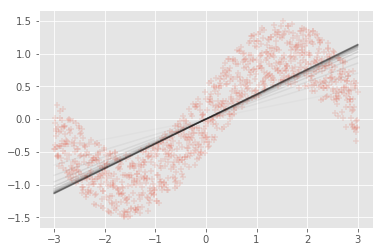

In [112]:
# We create a session to use the graph
n_iterations = 500

# Plot the true data distribution
fig, ax = plt.subplots(1, 1)
ax.scatter(xs, ys, alpha=0.15, marker='+')
with tf.Session() as sess:
    # Here we tell tensorflow that we want to initialize all
    # the variables in the graph so we can use them
    # This will set `W` and `b` to their initial random normal value.
    sess.run(tf.global_variables_initializer())

    # We now run a loop over epochs
    prev_training_cost = 0.0
    for it_i in range(n_iterations):
        sess.run(optimizer, feed_dict={X: xs, Y: ys})
        training_cost = sess.run(cost, feed_dict={X: xs, Y: ys})

        # every 10 iterations
        if it_i % 10 == 0:
            # let's plot the x versus the predicted y
            ys_pred = Y_pred.eval(feed_dict={X: xs}, session=sess)

            # We'll draw points as a scatter plot just like before
            # Except we'll also scale the alpha value so that it gets
            # darker as the iterations get closer to the end
            ax.plot(xs, ys_pred, 'k', alpha=it_i / n_iterations)
            fig.show()
            plt.draw()

            # And let's print our training cost: mean of absolute differences
            print(training_cost)

        # Allow the training to quit if we've reached a minimum
        if np.abs(prev_training_cost - training_cost) < 0.000001:
            break

        # Keep track of the training cost
        prev_training_cost = training_cost

After running the code, we should see our original noisy data.  We call that the training data since it is training the network.  And we see the output of the network as a solid black line.

Now you might be thinking, wait, that looks like nothing like a sine wave... I mean it has got the general trend of the line I guess.  But it doesn't curve at all!  We're going to get into why that is in a moment.

But first, we're going to have to learn a bit more about the different between training and testing networks.

<a name="training-vs-testing"></a>
## Training vs. Testing

<TODO:>

<a name="stochastic-and-mini-batch-gradient-descent"></a>
## Stochastic and Mini Batch Gradient Descent

Now remember when I said our cost manifold would have many local minima, and that we'd learn some tricks to help us find the best one?  Well now we're ready to talk about two ways of helping with that.  One is using what are called mini-batches.  This is useful for a number of reasons.  First, it is generally impractical to look at an entire dataset.  You might have millions of images which you couldn't ever try loading all at once into a network.  Instead you would look at some random subset of them.  Second, we avoid trying to generalize our entire dataset, allowing us to navigate through more fine grained terrain.  In order to use mini batches, we simply iterate through our entire dataset, `batch_size` at a time:

In [4]:
idxs = np.arange(100)
batch_size = 10
n_batches = len(idxs) // batch_size
for batch_i in range(n_batches):
    print(idxs[batch_i * batch_size : (batch_i + 1) * batch_size])

[0 1 2 3 4 5 6 7 8 9]
[10 11 12 13 14 15 16 17 18 19]
[20 21 22 23 24 25 26 27 28 29]
[30 31 32 33 34 35 36 37 38 39]
[40 41 42 43 44 45 46 47 48 49]
[50 51 52 53 54 55 56 57 58 59]
[60 61 62 63 64 65 66 67 68 69]
[70 71 72 73 74 75 76 77 78 79]
[80 81 82 83 84 85 86 87 88 89]
[90 91 92 93 94 95 96 97 98 99]


It turns out that this is not the best idea, because we're always looking at the same order of our dataset.  Neural networks love order.  They will pick up on any order you give it and use that to its advantage.  But the order of the data is entirely irrelevant to our problem.  In some cases, it may turn out to be exactly what we want to do.  For instance, if we want to learn about how something changes over time, like audio, or letters or words in a sequence which form sentences.  Then we will have to make sure we're sending data in a certain order.  But for now, we really want to avoid using any order.

So we'll have to randomly permute the indexes of our dataset like so:

In [114]:
rand_idxs = np.random.permutation(idxs)
batch_size = 10
n_batches = len(rand_idxs) // batch_size
print('# of batches:', n_batches)
for batch_i in range(n_batches):
    print(rand_idxs[batch_i * batch_size : (batch_i + 1) * batch_size])

# of batches: 10
[70 92 91 21 57 99 84 10 19 22]
[94 17 81 55  6 46 78 90 28 51]
[60 69  3 85 23 62 15 68 71 30]
[52 37 56 44 61 74 96 95 72 82]
[79 42 54 18 93 65 14 86 16 36]
[73 35 80 27 32  5  7 59 25 29]
[89 39  2 43 50 67 45 33 13 34]
[66 41 24 75 83  8 48 97  0 53]
[77 88 98 47  4 49 64 76 31 11]
[40 63 58 12 87 26 20 38  9  1]


What we've done above is look at a range of 100 possible indexes by chunking them into `batch_size` at a time.  But we've also randomized the order we've looked at them so that we aren't prioritizing learning one part of a dataset over another.

We can implement this into our previous code like so:

0.7103495
0.54351085
0.45346057
0.41494656
0.3999953
0.39286292
0.38987336
0.388789
0.38839233
0.3881759
0.38807604
0.38802344
0.38800552
0.38799205
0.38798732
0.3879853
0.38798413
0.38798288
0.38798174
0.3879806
0.38797948
0.3879782
0.38797784
0.38797787
0.38797784
0.38797784
0.38797784
0.38797787
0.3879778
0.38797778
0.38797778
0.38797784
0.38797778
0.38797778
0.38797772
0.38797778
0.38797775
0.38797778
0.38797772
0.3879777
0.3879777
0.38797772
0.38797766
0.3879777
0.3879777
0.3879777
0.38797766
0.38797772
0.38797766
0.3879777


/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


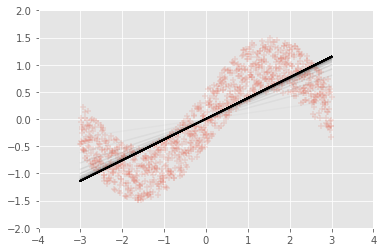

In [115]:
batch_size = 1000
fig, ax = plt.subplots(1, 1)
ax.scatter(xs, ys, alpha=0.15, marker='+')
ax.set_xlim([-4, 4])
ax.set_ylim([-2, 2])
with tf.Session() as sess:
    # Here we tell tensorflow that we want to initialize all
    # the variables in the graph so we can use them
    # If we had used tf.random_normal_initializer or tf.constant_intitializer,
    # then this would have set `W` and `b` to their initial values.
    sess.run(tf.global_variables_initializer())

    # We now run a loop over epochs
    prev_training_cost = 0.0
    for it_i in range(n_iterations):
        idxs = np.random.permutation(range(len(xs)))
        n_batches = len(idxs) // batch_size
        for batch_i in range(n_batches):
            idxs_i = idxs[batch_i * batch_size: (batch_i + 1) * batch_size]
            sess.run(optimizer, feed_dict={X: xs[idxs_i], Y: ys[idxs_i]})

        training_cost = sess.run(cost, feed_dict={X: xs, Y: ys})

        if it_i % 10 == 0:
            ys_pred = Y_pred.eval(feed_dict={X: xs}, session=sess)
            ax.plot(xs, ys_pred, 'k', alpha=it_i / n_iterations)
            print(training_cost)
fig.show()
plt.draw()

The resulting process is also know as Mini-Batch Gradient Descent, since we are taking smaller batches of our data and performing gradient descent.  Further, it is Stochastic, meaning the order of the data presented is randomized, and is also commonly referred to as Stochastic Gradient Descent.  When the two ideas are combined, we have the best of both worlds: the mini batch part which allows us to get more stable updates; and the stochastic part which allows us to move to different parts of our cost's manifold entirely.  I'll just use Gradient Descent as we'll always want it to be in batches, and to be the stochastic kind.

Let's stick all of the code necessary for training into a function so we don't have to type it out again:

In [116]:
def train(X, Y, Y_pred, n_iterations=100, batch_size=200, learning_rate=0.02):
    cost = tf.reduce_mean(distance(Y_pred, Y))
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
    fig, ax = plt.subplots(1, 1)
    ax.scatter(xs, ys, alpha=0.15, marker='+')
    ax.set_xlim([-4, 4])
    ax.set_ylim([-2, 2])
    with tf.Session() as sess:
        # Here we tell tensorflow that we want to initialize all
        # the variables in the graph so we can use them
        # This will set W and b to their initial random normal value.
        sess.run(tf.global_variables_initializer())

        # We now run a loop over epochs
        prev_training_cost = 0.0
        for it_i in range(n_iterations):
            idxs = np.random.permutation(range(len(xs)))
            n_batches = len(idxs) // batch_size
            for batch_i in range(n_batches):
                idxs_i = idxs[batch_i * batch_size: (batch_i + 1) * batch_size]
                sess.run(optimizer, feed_dict={X: xs[idxs_i], Y: ys[idxs_i]})

            training_cost = sess.run(cost, feed_dict={X: xs, Y: ys})

            if it_i % 10 == 0:
                ys_pred = Y_pred.eval(feed_dict={X: xs}, session=sess)
                ax.plot(xs, ys_pred, 'k', alpha=it_i / n_iterations)
                print(training_cost)
    fig.show()
    plt.draw()

To get closer to a sine wave, we're going to have to be able to do more than simply scale our input with a multiplication!  What if we had a lot more parameters?  What if we have 10 different multiplications of the input?  What does your intuition tell you?  How are 10 more multiplications combined?  1000?  A million?

<QUIZ>

Would we be able to find a good representation then?  Let's try and see how we might do that:

3.6029985
2.84527
3.2646825
3.2280977
3.4255815
2.3405957
2.257095
2.7841525
3.2047982
3.118179


/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


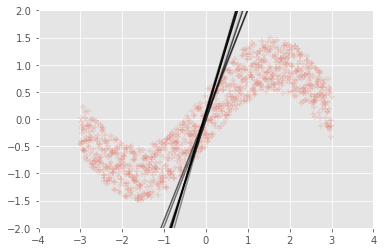

In [117]:
# We're going to multiply our input by 100 values, creating an "inner layer"
# of 100 neurons.
n_neurons = 100
W = tf.Variable(tf.random_normal([1, n_neurons], stddev=0.1))

# and allow for n_neurons additions on each of those neurons
b = tf.Variable(tf.constant(0, dtype=tf.float32, shape=[n_neurons]))

# Instead of multiplying directly, we use tf.matmul to perform a
# matrix multiplication
h = tf.matmul(tf.expand_dims(X, 1), W) + b

# Create the operation to add every neuron's output
Y_pred = tf.reduce_sum(h, 1)

# Retrain with our new Y_pred
train(X, Y, Y_pred)

First, the training takes a lot longer!  That's because our network is much larger.  By adding 100 neurons, we've added 100 more multiplications, and 100 more additions for every observation.  Since we have 10000 observations, that's $(100 + 100) * 10000$ more computations just for computing the output, or 100 million more computations.  But that's not all.  We also need to compute the gradients of every parameter!  Having all of these extra parameters makes it much harder to find the best solution.  So as our network expands, the amount of memory and computation will grow very fast, and training becomes more difficult.

Despite increasing everything about our network, looking at the cost, we're not doing much better!  Why is that?  Well, we've added a lot more multiplications.  But it hasn't changed the fact that our function is still just a linear function.  Multiplying a millions times wouldn't help but instead just make it harder to find the same solution we found with far less parameters.  But also, the cost is going up and down, instead of just down.  That's a good sign that we should probably reduce the learning rate.

<a name="inputs-representation"></a>
## Input's Representation

In order to get more complexity, we could consider changing our input's representation.  For instance, if you are working with sound, it may not be the best idea to think about representing the sound as a signal, and instead you might want to explore using something like the discrete fourier transform.  Or if you're working with text, there may be other representations that will allow you to learn more useful features of your data such as word histograms.  There may be other possibilities depending on your application.

<a name="over-vs-underfitting"></a>
## Over vs. Underfitting

One technique for representing curved data like a sine wave is to consider the different polynomials of your input.

0.63577807
0.39694768
0.38826862
0.38799277
0.3879834
0.38798517
0.38798058
0.38798162
0.3879779
0.38798004


/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


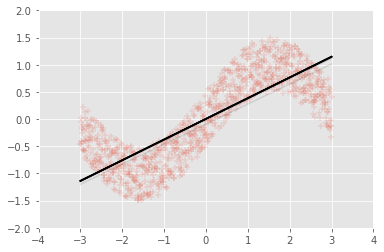

In [118]:
# Instead of a single factor and a bias, we'll create a polynomial function
# of different degrees.  We will then learn the influence that each
# degree of the input (X^0, X^1, X^2, ...) has on the final output (Y).
Y_pred = tf.Variable(tf.random_normal([1]), name='bias')
for pow_i in range(1, 2):
    W = tf.Variable(
        tf.random_normal([1], stddev=0.1), name='weight_%d' % pow_i)
    Y_pred = tf.add(tf.multiply(tf.pow(X, pow_i), W), Y_pred)

# And then we'll retrain with our new Y_pred
train(X, Y, Y_pred)

If we use the 0th and 1st expansion, that is $x^0$, which just equals 1, and $x^1$.  So $x * W_1$.  That's exactly the same as what we've just done.  It starts to get interesting once we add more powers:

0.6501753
0.45013976
0.40994176
0.6100081
0.63075155
0.44357952
0.7466347
0.6033313
0.5525324
0.5326454


/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


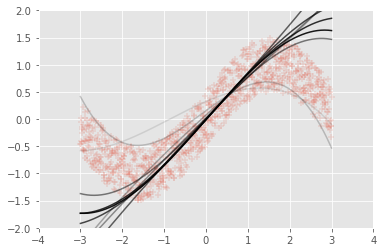

In [119]:
# Instead of a single factor and a bias, we'll create a polynomial function
# of different degrees.  We will then learn the influence that each
# degree of the input (X^0, X^1, X^2, ...) has on the final output (Y).
Y_pred = tf.Variable(tf.random_normal([1]), name='bias')
for pow_i in range(1, 4):
    W = tf.Variable(
        tf.random_normal([1], stddev=0.1), name='weight_%d' % pow_i)
    Y_pred = tf.add(tf.multiply(tf.pow(X, pow_i), W), Y_pred)

# And then we'll retrain with our new Y_pred
train(X, Y, Y_pred)

But we really don't want to add *too many* powers.  If we add just 1 more power:

2.072206
4.3988066
1.738366
2.798875
0.6777607
1.7116555
2.1095173
1.8293412
0.7896488
3.9002237


/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


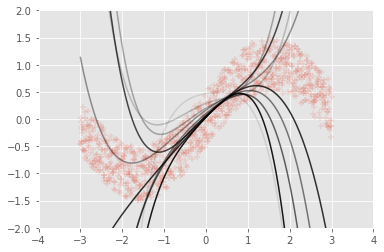

In [120]:
# Instead of a single factor and a bias, we'll create a polynomial function
# of different degrees.  We will then learn the influence that each
# degree of the input (X^0, X^1, X^2, ...) has on the final output (Y).
Y_pred = tf.Variable(tf.random_normal([1]), name='bias')
for pow_i in range(1, 5):
    W = tf.Variable(
        tf.random_normal([1], stddev=0.1), name='weight_%d' % pow_i)
    Y_pred = tf.add(tf.multiply(tf.pow(X, pow_i), W), Y_pred)

# And then we'll retrain with our new Y_pred
train(X, Y, Y_pred)

The whole thing is completely off.  In general, a polynomial expansion is hardly ever useful as it requires us to know what the underlying function is, meaning, what order polynomial is it?

<a name="introducing-nonlinearities--activation-function"></a>
## Introducing Nonlinearities / Activation Function

How else can we get our line to express the curves in our data?  What we'll explore instead is what happens when you add a non-linearity, which you might also hear be called an activation function.  That is a really essential ingredient to any deep network.  Practically every complex deep learning algorithm performs a series of linear, followed by nonlinear operations.  By stacking sets of these, the complexity and power of expression grows far greater than any linear equation could.

We'll typically make use of one of three non-linearities for the rest of this course:

/opt/conda/lib/python3.6/site-packages/tensorflow/python/client/session.py:1711: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


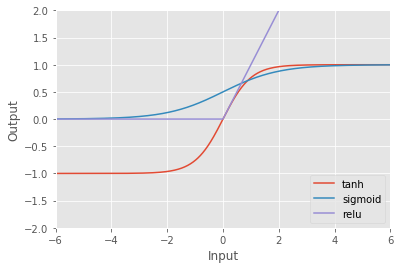

In [121]:
sess = tf.InteractiveSession()
x = np.linspace(-6,6,1000)
plt.plot(x, tf.nn.tanh(x).eval(), label='tanh')
plt.plot(x, tf.nn.sigmoid(x).eval(), label='sigmoid')
plt.plot(x, tf.nn.relu(x).eval(), label='relu')
plt.legend(loc='lower right')
plt.xlim([-6, 6])
plt.ylim([-2, 2])
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid('on')

What each of these curves demonstrates is how instead of just multiplying an input by a number, creating another line, we *non*-linearly multiply the input value.  That just means we will multiply our input by a different value depending on what the input value is.  This allows us to express very complex ideas.  If we do this enough times, we can express anything.  Let's see how we can do this

1.6525576
0.4374646
0.29585785
0.26765734
0.2606434
0.2584789
0.25753617
0.25699726
0.25672537
0.25655657


/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


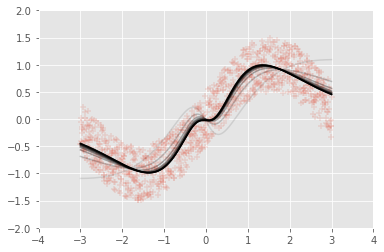

In [122]:
# We're going to multiply our input by 10 values, creating an "inner layer"
# of n_neurons neurons.
n_neurons = 10
W = tf.Variable(tf.random_normal([1, n_neurons]), name='W')

# and allow for n_neurons additions on each of those neurons
b = tf.Variable(tf.constant(0, dtype=tf.float32, shape=[n_neurons]), name='b')

# Instead of just multiplying, we'll put our n_neuron multiplications through a non-linearity, the tanh function.
h = tf.nn.tanh(tf.matmul(tf.expand_dims(X, 1), W) + b, name='h')

Y_pred = tf.reduce_sum(h, 1)

# And retrain w/ our new Y_pred
train(X, Y, Y_pred)

<TODO: Graphic of fully connected network, matrix>

It turns out that multiplying our input by a matrix, adding a bias, and then applying a non-linearity is something we'll need to do a lot.  It's often called a fully-connected network, since everything is connected to everything else, meaning every neuron is multiplied by every single input value.  This is also sometimes called a linear layer, since we are linearly combining the values of the input to create the resulting neuron.

You might have seen this depicted like so:


<a name="going-deeper"></a>
## Going Deeper

Let's write a simply function for creating the same type of network as above:

In [123]:
def linear(X, n_input, n_output, activation=None):
    W = tf.Variable(tf.random_normal([n_input, n_output], stddev=0.1), name='W')
    b = tf.Variable(
        tf.constant(0, dtype=tf.float32, shape=[n_output]), name='b')
    h = tf.nn.tanh(tf.matmul(X, W) + b, name='h')
    return h

Let's now take a look at what the tensorflow graph looks like when we create this type of connection:

In [124]:
# first clear the graph
from tensorflow.python.framework import ops
ops.reset_default_graph()

# let's get the current graph
g = tf.get_default_graph()

# See the names of any operations in the graph
[op.name for op in tf.get_default_graph().get_operations()]

# let's create a new network
X = tf.placeholder(tf.float32, name='X')
h = linear(X, 2, 10)

# See the names of any operations in the graph
[op.name for op in tf.get_default_graph().get_operations()]

['X',
 'random_normal/shape',
 'random_normal/mean',
 'random_normal/stddev',
 'random_normal/RandomStandardNormal',
 'random_normal/mul',
 'random_normal',
 'W',
 'W/Assign',
 'W/read',
 'Const',
 'b',
 'b/Assign',
 'b/read',
 'MatMul',
 'add',
 'h']

The names of the variables in this network aren't very helpful.  We can actually do a much better job here by creating our variables within *scopes*:

In [125]:
def linear(X, n_input, n_output, activation=None, scope=None):
    with tf.variable_scope(scope or "linear"):
        W = tf.get_variable(
            name='W',
            shape=[n_input, n_output],
            initializer=tf.random_normal_initializer(mean=0.0, stddev=0.1))
        b = tf.get_variable(
            name='b',
            shape=[n_output],
            initializer=tf.constant_initializer())
        h = tf.matmul(X, W) + b
        if activation is not None:
            h = activation(h)
        return h

We've also moved from using a single random value, to using an initializer.  This initializer will create a new random value every time we call `sess.run(tf.global_variables_initializer())`.  We also pass some more sensible values for the initial mean and standard deviation.

Now let's look at the graph:

In [126]:
# first clear the graph
from tensorflow.python.framework import ops
ops.reset_default_graph()

# let's get the current graph
g = tf.get_default_graph()

# See the names of any operations in the graph
[op.name for op in tf.get_default_graph().get_operations()]

# let's create a new network
X = tf.placeholder(tf.float32, name='X')
h = linear(X, 2, 10, scope='layer1')

# See the names of any operations in the graph
[op.name for op in tf.get_default_graph().get_operations()]

['X',
 'layer1/W/Initializer/random_normal/shape',
 'layer1/W/Initializer/random_normal/mean',
 'layer1/W/Initializer/random_normal/stddev',
 'layer1/W/Initializer/random_normal/RandomStandardNormal',
 'layer1/W/Initializer/random_normal/mul',
 'layer1/W/Initializer/random_normal',
 'layer1/W',
 'layer1/W/Assign',
 'layer1/W/read',
 'layer1/b/Initializer/Const',
 'layer1/b',
 'layer1/b/Assign',
 'layer1/b/read',
 'layer1/MatMul',
 'layer1/add']

We can see that everything that is part of creating a linear connection is under the scoped tag we have given it.

If we create multiple linear connections, this becomes really useful for understanding what's in our graph:

In [127]:
# Let's connect the output of our last network to another one!

# Wow we just made a Deep Network!  Let's make it deeper!
h2 = linear(h, 10, 10, scope='layer2')

# Again!
h3 = linear(h2, 10, 3, scope='layer3')

# Now when we look at the names of the operations in the graph, we can directly see which operations belong to each layer!
[op.name for op in tf.get_default_graph().get_operations()]

['X',
 'layer1/W/Initializer/random_normal/shape',
 'layer1/W/Initializer/random_normal/mean',
 'layer1/W/Initializer/random_normal/stddev',
 'layer1/W/Initializer/random_normal/RandomStandardNormal',
 'layer1/W/Initializer/random_normal/mul',
 'layer1/W/Initializer/random_normal',
 'layer1/W',
 'layer1/W/Assign',
 'layer1/W/read',
 'layer1/b/Initializer/Const',
 'layer1/b',
 'layer1/b/Assign',
 'layer1/b/read',
 'layer1/MatMul',
 'layer1/add',
 'layer2/W/Initializer/random_normal/shape',
 'layer2/W/Initializer/random_normal/mean',
 'layer2/W/Initializer/random_normal/stddev',
 'layer2/W/Initializer/random_normal/RandomStandardNormal',
 'layer2/W/Initializer/random_normal/mul',
 'layer2/W/Initializer/random_normal',
 'layer2/W',
 'layer2/W/Assign',
 'layer2/W/read',
 'layer2/b/Initializer/Const',
 'layer2/b',
 'layer2/b/Assign',
 'layer2/b/read',
 'layer2/MatMul',
 'layer2/add',
 'layer3/W/Initializer/random_normal/shape',
 'layer3/W/Initializer/random_normal/mean',
 'layer3/W/Initiali

<TODO: Also, we can visualize our network using Tensorboard...>

<a name="image-inpainting"></a>
# Image Inpainting

<a name="description"></a>
## Description

Now we've got most of the tools we'll need to perform much more complicated tasks.  We'll first explore a fun application: painting an image.  This network is just meant to demonstrate how the previous networks we've learned can be scaled to more complicated tasks without much modification.

We'll follow an example that Andrej Karpathy has done in his online demonstration of "image inpainting".  Let's first get an image that we'll try to teach a neural network to paint.

/opt/conda/lib/python3.6/site-packages/scipy/misc/pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if issubdtype(ts, int):
/opt/conda/lib/python3.6/site-packages/scipy/misc/pilutil.py:485: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):


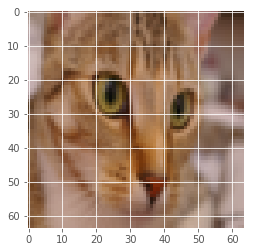

In [128]:
from skimage.data import  astronaut, chelsea
from scipy.misc import imresize
#img = astronaut()
#img = imresize(astronaut(), (64, 64))
img = imresize(chelsea(), (64, 64))
plt.imshow(img)

Instead of using a network to go from some x position to the value of a sine wave, what we're going to do instead teach a network to go from the location on an image frame to a particular color.  So given any position in an image, the network will need to learn what color to paint.  Despite the seeming complexity of this task, it is remarkably similar to what we've just done.  Let's take a look.

In [129]:
# We'll first collect all the positions in the image in our list, xs
xs = []

# And the corresponding colors for each of these positions
ys = []

# Now loop over the image
for row_i in range(img.shape[0]):
    for col_i in range(img.shape[1]):
        # And store the inputs
        xs.append([row_i, col_i])
        # And outputs that the network needs to learn to predict
        ys.append(img[row_i, col_i])

# we'll convert our lists to arrays
xs = np.array(xs)
ys = np.array(ys)

# Normalizing the input by the mean and standard deviation
xs = (xs - np.mean(xs)) / np.std(xs)

# and print the shapes
xs.shape, ys.shape

((4096, 2), (4096, 3))

What we're going to do is use regression to predict the value of a pixel given its (row, col) position.  So the input to our network is `X = (row, col)` value.  And the output of the network is `Y = (r, g, b)`.

We can get our original image back by reshaping the colors back into the original image shape:

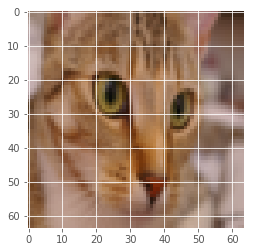

In [130]:
plt.imshow(ys.reshape(img.shape))

Remember before, we were using regression to input to our network `X = x`, and output `Y = y`.  The only thing that is changing here is the number of values in our input and output, and what they represent to us.  But Tensorflow can handle any number of values we give it, so this is actually a pretty simple modification to the network definition.  We'll stick with the convention of using the variable `X` to denote the input to the network, and `Y` to denote the output of the network.

In [131]:
X = tf.placeholder(tf.float32, shape=[None, 2], name='X')
Y = tf.placeholder(tf.float32, shape=[None, 3], name='Y')

<a name="building-the-network"></a>
## Building the Network

For our model, we'll make our first deep neural network!  Instead of having a single fully connected layer, we'll have many layers.  We'll make use of a for loop to simplify the creation of the network. The network will look like:

<TODO: wacom/motion-graphic>

In [132]:
n_neurons = [2, 64, 64, 64, 64, 64, 64, 3]

current_input = X
for layer_i in range(1, len(n_neurons)):
    current_input = linear(
        X=current_input,
        n_input=n_neurons[layer_i - 1],
        n_output=n_neurons[layer_i],
        activation=tf.nn.relu if (layer_i+1) < len(n_neurons) else None,
        scope='layer_' + str(layer_i))
Y_pred = current_input

The rest of this code is pretty much the same as what we've done in previous networks.  We setup our cost.  Except before, we only ever had 1 feature.  In this network, our output is 3 vaules, `r`, `g`, `b`.

<a name="training"></a>
## Training

In order to better measure the error, we'll sum the error across all 3 values.  There are many ways we could have approached this which we'll get into in later sessions.

In [133]:
cost = tf.reduce_mean(
    tf.reduce_sum(distance(Y_pred, Y), 1))

We're going to use a different type of optimizer called `AdamOptimizer` which in general will work better than the original `GradientDescentOptimizer`.  It's pretty similar, except it has some tricks to help with gradient descent.  Getting into the details of it is beyond the scope of what we have time for.  So long as you're not working with sequential data or building a recurrent network, it will probably always work better than just using GradientDescent.

In [134]:
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

The rest of the code is pretty much the same.  We create the optimizer exactly the same way, by giving it our cost.  And then create a session to iterate over chunks of our training data.  Every 20 iterations, we're going to draw the predicted image by evaluating the predicted image tensor, `Y_pred`, and giving it every location in the image to predict, the `xs` array.  This will return us the predicted color values for those locations.  This process will take awhile!

In [5]:
n_iteration = 800
batch_size = 50
idxs = np.random.permutation(range(len(xs)))
print(idxs)

NameError: name 'xs' is not defined

0 85.76139
1 74.100525
2 71.14337
3 69.751945
4 69.16729
5 70.18608
6 68.40747
7 69.8628
8 69.55989
9 67.23547
10 66.76076
11 67.05759
12 65.85443
13 64.86749
14 65.055954
15 64.17236
16 63.593052
17 65.43277
18 63.31008
19 63.216606


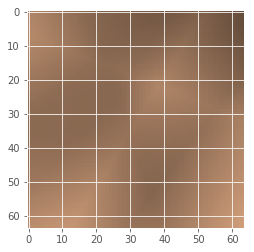

20 62.631973
21 63.556046
22 63.292217
23 63.309666
24 62.555107
25 63.7079
26 62.98903
27 62.318977
28 62.395622
29 65.870346
30 61.97518
31 61.916092
32 61.851196
33 61.96642
34 62.109383
35 61.878136
36 62.211746
37 61.977524
38 62.02733
39 61.71026


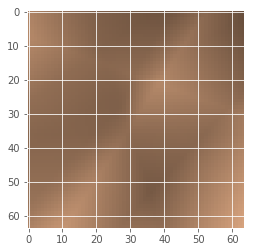

40 62.509087
41 62.3046
42 64.409035
43 61.57647
44 64.42992
45 62.053757
46 61.377026
47 63.89318
48 63.404106
49 61.285057
50 62.633347
51 61.15028
52 63.312016
53 62.22729
54 63.280193
55 60.85463
56 61.55375
57 60.181084
58 59.528126
59 59.76065


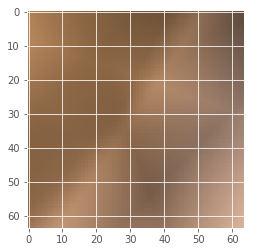

60 60.86271
61 60.58167
62 59.241623
63 59.4797
64 58.55986
65 58.448265
66 59.19143
67 57.481743
68 57.305984
69 56.86572
70 58.289505
71 56.423573
72 56.719162
73 56.180443
74 56.709656
75 57.401726
76 55.650814
77 56.767673
78 56.335983
79 56.298584


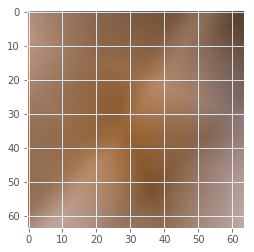

80 55.680786
81 55.12627
82 54.72625
83 55.104706
84 54.992847
85 54.773712
86 65.12161
87 54.056213
88 53.836662
89 55.663715
90 54.64688
91 53.94554
92 53.5884
93 55.305534
94 53.325447
95 53.267574
96 53.45939
97 53.80081
98 53.89195
99 53.622047


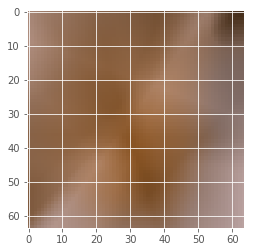

100 52.343063
101 54.115295
102 52.24901
103 53.5829
104 52.328102
105 51.71556
106 53.010315
107 55.539566
108 54.056873
109 51.671925
110 52.600388
111 52.306095
112 51.717827
113 51.294357
114 51.30741
115 51.027863
116 50.390224
117 51.855682
118 53.82587
119 51.083344


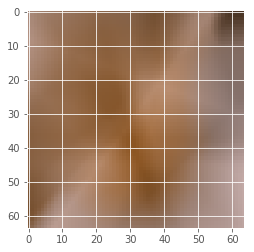

120 50.256584
121 50.71849
122 50.316948
123 50.37728
124 49.958027
125 50.10974
126 54.498634
127 51.50288
128 50.212753
129 54.14305
130 49.284252
131 50.89453
132 49.335106
133 49.2146
134 50.85975
135 49.303997
136 49.20096
137 49.17939
138 49.35971
139 50.85122


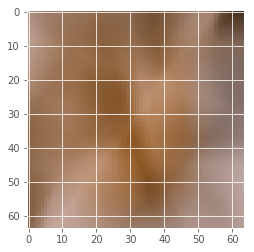

140 50.363716
141 49.249794
142 49.870857
143 52.77496
144 48.889404
145 49.08074
146 48.388268
147 48.586678
148 50.542137
149 49.36066
150 49.380737
151 48.74796
152 46.98328
153 47.74415
154 48.406487
155 47.94622
156 47.3443
157 50.095413
158 51.74408
159 47.97761


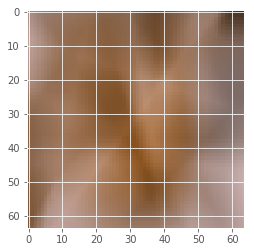

160 46.537655
161 47.706047
162 46.956467
163 48.09014
164 47.927544
165 49.75436
166 47.104668
167 47.818825
168 46.856674
169 47.232487
170 53.590176
171 47.011612
172 46.674595
173 46.81806
174 45.818825
175 46.15295
176 45.21157
177 47.30557
178 45.236336
179 45.111008


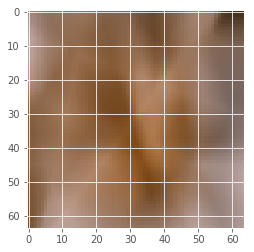

180 45.474487
181 47.98886
182 44.371178
183 44.728985
184 45.77926
185 44.290558
186 44.55593
187 44.922497
188 43.209015
189 45.054092
190 46.718838
191 46.42254
192 43.61075
193 42.254128
194 44.844444
195 42.63285
196 42.406067
197 45.56305
198 41.66243
199 41.891747


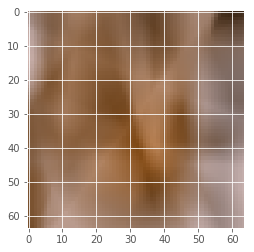

200 43.89959
201 45.366646
202 45.08115
203 47.13559
204 42.003395
205 43.45871
206 40.045605
207 41.892273
208 41.856445
209 40.075874
210 43.03353
211 40.8264
212 40.083447
213 39.35726
214 40.1903
215 43.809086
216 40.225693
217 41.033485
218 40.04022
219 40.735123


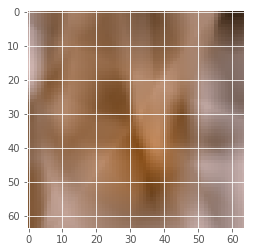

220 41.351868
221 42.964203
222 39.56526
223 40.13478
224 38.605743
225 39.814068
226 39.69196
227 38.295906
228 38.40221
229 38.592045
230 38.346443
231 38.704712
232 46.402096
233 38.802105
234 37.697006
235 37.149395
236 38.18934
237 39.24752
238 40.104103
239 36.98101


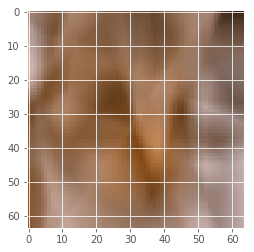

240 37.512062
241 37.1618
242 37.16999
243 36.711334
244 39.145744
245 38.285347
246 38.41893
247 41.425682
248 37.028717
249 44.416653
250 36.143364
251 43.96948
252 38.364746
253 38.7789
254 36.59621
255 36.654736
256 36.206486
257 34.883034
258 39.162468
259 39.229134


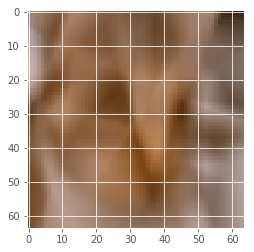

260 37.38058
261 35.93573
262 37.64649
263 37.082634
264 40.93138
265 35.84279
266 37.919792
267 35.135178
268 36.53202
269 39.955856
270 37.03692
271 35.565598
272 35.307915
273 36.083237
274 37.210205
275 37.388107
276 39.13507
277 35.19762
278 35.590637
279 39.144764


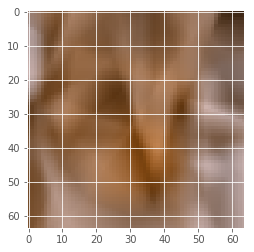

280 35.24576
281 34.967026
282 36.685898
283 36.842293
284 36.785873
285 35.466434
286 34.0924
287 34.991554
288 35.060623
289 36.74688
290 33.962154
291 34.652714
292 33.458492
293 35.79669
294 34.475048
295 33.307545
296 34.805756
297 34.721367
298 35.059143
299 33.68534


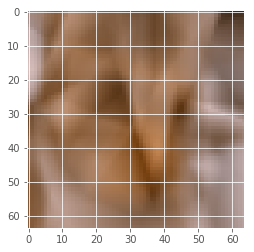

300 36.138214
301 33.507477
302 33.125534
303 33.213657
304 34.26283
305 36.46685
306 33.64531
307 34.58111
308 38.915215
309 33.060783
310 34.177742
311 31.815556
312 33.30114
313 37.274193
314 31.981632
315 35.330833
316 34.166824
317 38.897484
318 33.911217
319 35.40425


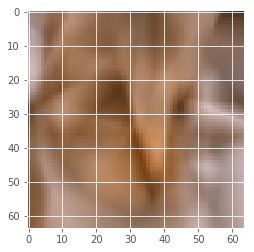

320 34.36238
321 34.913013
322 32.47715
323 32.4515
324 31.97195
325 31.426842
326 31.87088
327 32.729446
328 32.971447
329 33.98979
330 32.442543
331 33.14088
332 33.814648
333 37.995327
334 35.427406
335 30.988518
336 33.951126
337 32.461376
338 33.434135
339 31.433327


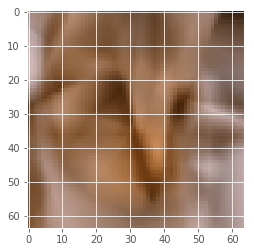

340 31.593212
341 37.348644
342 33.625175
343 35.69645
344 33.71029
345 34.979927
346 31.854803
347 31.096869
348 32.638977
349 32.700947
350 31.021412
351 34.188213
352 30.875164
353 31.107006
354 32.03798
355 32.45693
356 35.488136
357 31.402647
358 32.48954
359 32.01114


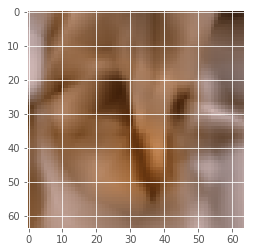

360 31.512783
361 31.114477
362 31.538998
363 32.23189
364 36.313114
365 31.2765
366 30.767145
367 30.55584
368 30.57681
369 34.428417
370 33.441086
371 29.504337
372 32.01164
373 33.15396
374 32.691956
375 30.643425
376 30.634281
377 29.11394
378 31.64035
379 30.416447


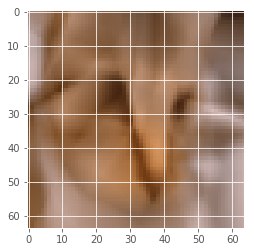

380 30.675251
381 29.62548
382 36.631737
383 33.47054
384 32.18142
385 33.83496
386 30.221876
387 29.536356
388 32.416603
389 30.084183
390 29.97229
391 31.014015
392 30.934664
393 28.416634
394 30.483833
395 29.282295
396 30.109547
397 29.585327
398 30.263897
399 30.21116


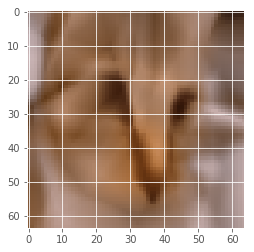

400 32.34214
401 33.242805
402 31.618309
403 29.057358
404 32.400414
405 30.78934
406 31.515999
407 29.19376
408 30.99479
409 30.59415
410 29.451443
411 30.411526
412 28.86037
413 34.872635
414 37.203365
415 29.966995
416 32.22616
417 32.691677
418 27.856188
419 29.62056


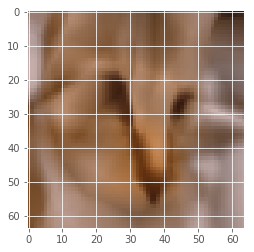

420 28.917164
421 27.406181
422 31.688068
423 30.528294
424 27.558014
425 30.106077
426 31.34769
427 32.413284
428 28.775345
429 30.499744
430 29.010551
431 28.096703
432 29.558525
433 30.151028
434 28.225487
435 28.146954
436 29.998482
437 28.176456
438 28.873882
439 30.950016


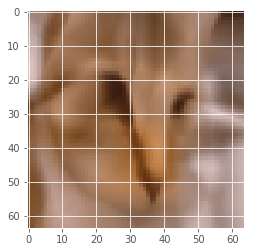

440 31.143515
441 28.33041
442 27.758022
443 28.929375
444 29.405153
445 29.3897
446 29.936184
447 29.336708
448 28.804703
449 27.411148
450 26.513655
451 28.78424
452 27.168692
453 28.173351
454 27.59516
455 27.395317
456 30.528164
457 31.625128
458 27.684572
459 32.25998


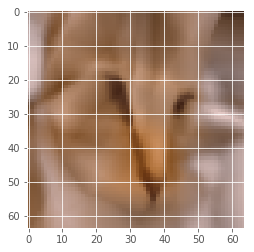

460 28.50901
461 28.92256
462 27.904924
463 28.238464
464 29.586033
465 26.878708
466 29.27306
467 27.849178
468 27.921711
469 28.113396
470 25.930742
471 27.666868
472 26.879467
473 27.61447
474 29.471151
475 29.691593
476 26.349274
477 30.479172
478 25.830854
479 26.47713


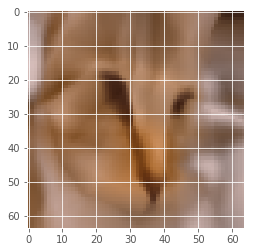

480 26.487165
481 26.552092
482 29.22879
483 31.726645
484 26.767971
485 30.530098
486 26.05119
487 28.097645
488 28.013699
489 26.267174
490 30.481308
491 27.91779
492 27.509693
493 26.283993
494 29.354372
495 26.778526
496 27.318962
497 27.462082
498 26.160564
499 25.700325


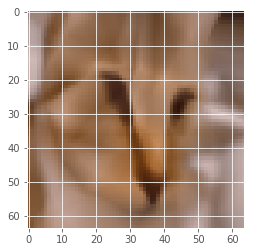

500 26.098583
501 32.174183
502 26.329948
503 26.662613
504 26.058825
505 28.031157
506 26.593369
507 28.467152
508 25.599129
509 25.036377
510 25.35721
511 26.050434
512 26.829475
513 27.125893
514 26.60822
515 28.305365
516 27.670712
517 24.81392
518 28.82262
519 26.282188


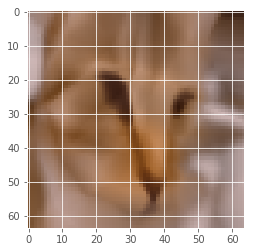

520 25.928703
521 25.13942
522 27.356121
523 25.87399
524 25.544754
525 25.343079
526 26.102062
527 26.210278
528 26.9205
529 24.811733
530 26.657412
531 27.694084
532 25.126072
533 25.024338
534 24.828102
535 27.014225
536 26.571098
537 25.615387
538 27.332394
539 26.631767


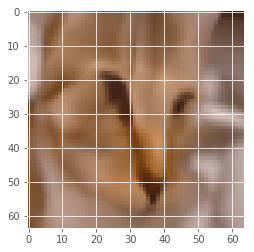

540 25.757763
541 24.924988
542 24.903381
543 23.939127
544 26.030775
545 28.4534
546 24.83862
547 26.09127
548 25.212606
549 24.89619
550 31.837803
551 26.326138
552 26.277967
553 31.00864
554 27.913498
555 24.72275
556 26.466003
557 24.70734
558 25.176476
559 26.81321


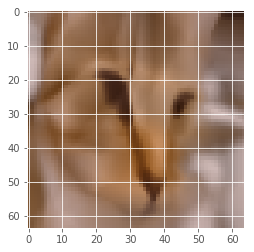

560 24.43266
561 28.219952
562 25.436188
563 27.096737
564 27.605669
565 25.45066
566 26.907804
567 24.228062
568 25.546219
569 24.720688
570 23.647465
571 31.659824
572 26.755917
573 26.521328
574 25.968704
575 26.17556
576 24.699392
577 24.601664
578 26.8923
579 25.98741


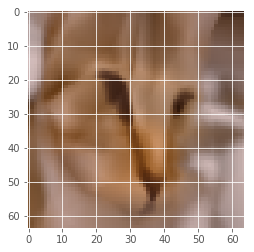

580 25.745062
581 24.148058
582 24.34103
583 24.1781
584 24.001003
585 26.612305
586 24.367422
587 24.858759
588 25.398487
589 24.51424
590 25.611107
591 25.252323
592 25.54717
593 24.945404
594 24.792305
595 25.473202
596 28.391865
597 26.556492
598 25.187107
599 27.276031


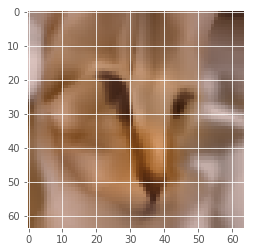

600 24.779846
601 24.27918
602 24.96217
603 24.756413
604 25.270126
605 25.00559
606 24.71884
607 23.639622
608 27.698025
609 24.335709
610 25.084644
611 25.48884
612 24.7107
613 23.140072
614 23.83755
615 24.984612
616 25.480967
617 24.572807
618 24.620953
619 23.758137


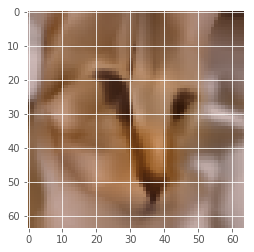

620 25.198086
621 24.925514
622 24.635725
623 24.801521
624 24.605743
625 26.877157
626 23.14003
627 24.414204
628 24.611969
629 24.382774
630 23.626907
631 23.886337
632 24.87532
633 26.067951
634 23.550512
635 24.289415
636 25.588276
637 23.995907
638 25.04697
639 22.992676


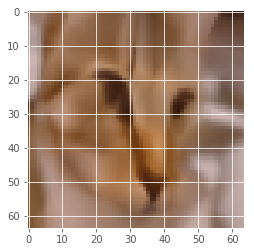

640 24.308048
641 24.129225
642 24.900635
643 22.866077
644 25.581749
645 25.191319
646 23.877014
647 22.791029
648 23.533321
649 23.297375
650 24.95269
651 27.462498
652 24.453297
653 26.836998
654 24.187366
655 22.734991
656 24.493765
657 23.27074
658 24.49857
659 23.585522


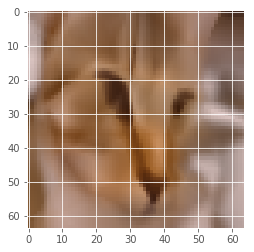

660 24.041939
661 24.530178
662 23.32028
663 24.087704
664 24.861115
665 24.78609
666 24.231071
667 23.286568
668 22.938309
669 23.9058
670 23.445568
671 23.64992
672 24.553574
673 22.823881
674 24.631056
675 23.212711
676 23.709244
677 22.915983
678 23.767185
679 25.450138


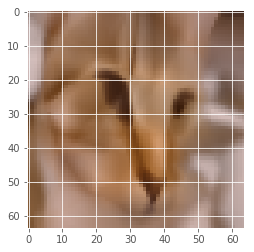

680 24.122253
681 24.132492
682 23.434303
683 23.58497
684 26.343224
685 22.662903
686 22.523163
687 22.488062
688 22.572449
689 23.125242
690 27.314194
691 22.580975
692 24.298138
693 22.617819
694 22.839355
695 24.931568
696 25.446678
697 22.833818
698 22.576963
699 23.078115


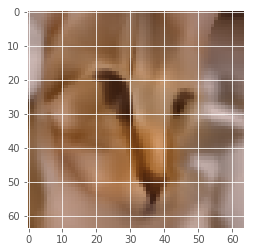

700 27.120811
701 22.332005
702 23.512539
703 22.71994
704 23.985077
705 23.027845
706 22.207586
707 24.031178
708 25.069283
709 24.07589
710 22.795078
711 24.529697
712 24.899933
713 24.046452
714 27.150331
715 22.440704
716 25.345028
717 23.096302
718 24.310804
719 23.250412


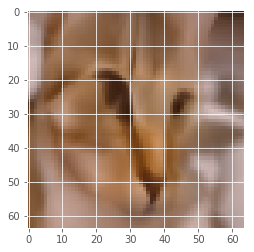

720 23.819265
721 22.76241
722 22.972351
723 23.4113
724 23.365778
725 23.997988
726 25.485195
727 25.582968
728 22.83165
729 24.133303
730 22.051853
731 23.062662
732 23.429928
733 23.149527
734 23.27261
735 21.563145
736 22.071308
737 24.181334
738 23.239899
739 21.93369


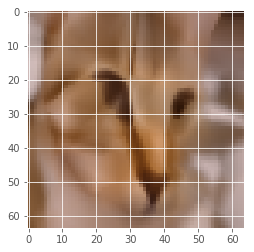

740 23.994444
741 22.349297
742 23.928291
743 23.066246
744 22.548164
745 21.051699
746 22.694641
747 21.757244
748 24.081339
749 22.82838
750 24.015633
751 21.954155
752 23.41936
753 21.033176
754 23.162395
755 22.71932
756 23.518276
757 23.551859
758 21.653433
759 21.147266


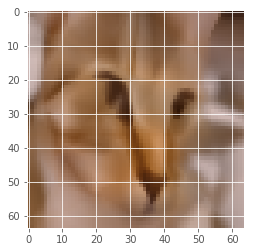

760 22.414055
761 21.538307
762 21.002323
763 22.322174
764 21.796768
765 25.351448
766 21.528738
767 21.055
768 21.903847
769 22.667078
770 23.437893
771 22.038422
772 27.050133
773 25.875557
774 22.917585
775 23.074299
776 22.486526
777 22.257366
778 21.434084
779 22.153238


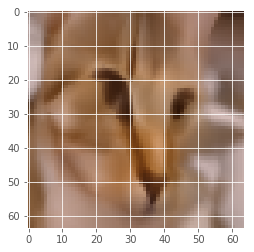

780 24.044579
781 22.684
782 26.569159
783 21.938282
784 21.753538
785 22.57328
786 21.607203
787 24.12148
788 22.329857
789 21.302212
790 21.695202
791 22.24026
792 22.332504
793 21.745916
794 21.861347
795 22.379152
796 21.463732
797 21.395727
798 21.526955
799 22.387426


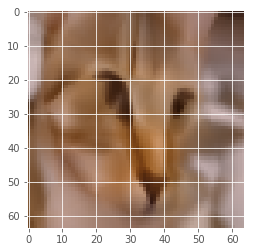

In [135]:
n_iterations = 800
batch_size = 50
with tf.Session() as sess:
    # Here we tell tensorflow that we want to initialize all
    # the variables in the graph so we can use them
    # This will set W and b to their initial random normal value.
    sess.run(tf.global_variables_initializer())

    # We now run a loop over epochs
    prev_training_cost = 0.0
    for it_i in range(n_iterations):
        idxs = np.random.permutation(range(len(xs)))
        n_batches = len(idxs) // batch_size
        for batch_i in range(n_batches):
            idxs_i = idxs[batch_i * batch_size: (batch_i + 1) * batch_size]
            sess.run(optimizer, feed_dict={X: xs[idxs_i], Y: ys[idxs_i]})

        training_cost = sess.run(cost, feed_dict={X: xs, Y: ys})
        print(it_i, training_cost)

        if (it_i + 1) % 20 == 0:
            ys_pred = Y_pred.eval(feed_dict={X: xs}, session=sess)
            fig, ax = plt.subplots(1, 1)
            img = np.clip(ys_pred.reshape(img.shape), 0, 255).astype(np.uint8)
            plt.imshow(img)
            plt.show()

After letting this run for a few minutes, we'll see the image becoming more like the original image.

<a name="homework"></a>
# Homework:

Head over to the [notebook](session-2.ipynb) for more details.

<a name="reading"></a>
# Reading:

Cauchy, Augustin (1847). Méthode générale pour la résolution des systèmes d'équations simultanées. pp. 536–538.

H. Robinds and S. Monro, “A stochastic approximation method,” Annals of Mathematical Statistics, vol. 22, pp. 400–407, 1951. 

Sutton, R. S. (1986). Two problems with backpropagation and other steepest-descent learning procedures for networks. Proc. 8th Annual Conf. Cognitive Science Society. 

Yann Lecun. Efficient BackProp. 1998.
http://yann.lecun.com/exdb/publis/pdf/lecun-98b.pdf

Kingma, D. P., & Ba, J. L. (2015). Adam: a Method for Stochastic Optimization. International Conference on Learning Representations, 1–13.

J. Schmidhuber. Deep Learning in Neural Networks: An Overview. Neural Networks, 61, p 85-117, 2015.